## **Ship Price Prediction**
* This research is conducted to predict a ship price using linear regression, lasso, and ridge models.
* The predicted price is vidualized with its 95% confident interval.  


#### Top  
[1. Import modules](#1.-Import-modules)  
[2. Load data](#2.-Load-data)  
[3. Basic statistics](#3.-Basic-statistics)  
[4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)  
[5. Text preprocessing](#5.-Text-preprocessing)  
[6. Data preprocessing](#6.-Data-preprocessing)  
[7. Finalize Dataset](#7.-Finalize-Dataset)  
[8. Linear Regression Model Creation](#8.-Linear-Regression-Model-Creation)  
[9. Model Performance Evaluation](#9.Model-Performance-Evaluation)  
[10. Confidence Interval](#10.-Confidence-Interval)

### **1. Import modules**  
[(Go to Top)](#Top)

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Set default style, title color, label color
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color': "#333333", 
                     'axes.labelcolor': "#333333", 'axes.labelweight': 'bold'})

### **2. Load data** 
[(Go to Top)](#Top)

In [83]:
# Load dataset
df = pd.read_csv(r"data/online_ship_listing_data.csv", encoding='utf8')

### **3. Basic statistics** 
* The dataset has 1850 rows , 15 columns
* The dataset has 4 numerical columns: 'price' 'year', 'id' and 'length'
* 'price' and 'length' are heavily right skewed
* The target variable is 'price'
* The rest of 11 columns are categorical columns
* 'hull_shape', 'hull_type', and 'model' have missing values
* 'Unnamed: 0', 'id' and 'name' columns are unnecesarry for analysis  
[(Go to Top)](#Top)

In [5]:
# Check the dataset
df.head()

,Unnamed: 0,name,price,location,offerer,id,description,year,manufacturer,model,category,length,fuel_type,hull_material,hull_shape,country
0,0,1976 Ketch Baarda Zeegrundel1976 Ketch Baarda ...,24500.0,"dinteloord, niederlande",Sealion Yachts,8222682,General: The Zeegrundel was originally designe...,1976,Ketch,Baarda Zeegrundel,Lastkahnsegelboote,900.00,diesel,steel,NaN,netherlands
1,1,1979 Dufour 28001979 Dufour 2800,9900.0,"greifswald, deutschland",Privater Verkäufer,8457402,Selling a well-preserved and equipped sailing ...,1979,Dufour,2800,Segelboote mit Kajüte,83.00,diesel,GFK / fiberglas / polyester,NaN,germany
2,2,2010 Van der Graaf Classic Schooner2010 Van de...,12000000.0,"contact de valk antibes, frankreich",De Valk Group B.V,7936534,Model: VAN DER GRAAF CLASSIC SCHOONER Type: sa...,2010,Van der Graaf,Classic Schooner,Slup Boote,65.84,diesel,steel,NaN,france
3,3,2010 Custom Van Der Graaf BV Schooner2010 Cust...,12000000.0,"imperia, italien",Bernard Gallay Yacht Brokerage,6751543,Price On Application\n \nThe current ATLANTIC ...,2010,Custom,Van Der Graaf BV Schooner,Schoner,64.50,diesel,steel,NaN,italy
4,4,2008 Custom Build Gulet2008 Custom Build Gulet,5000000.0,türkei,Gino Group,469955,A beautiful 43m Gulet classic luxury style bui...,2008,Custom Build,Gulet,Segelyachten,42.98,diesel,wood,NaN,turkey


In [6]:
df.shape

(1850, 16)

In [7]:
df.describe(include=np.object).T

,count,unique,top,freq
name,1850,1752,2015 Beneteau Oceanis 452015 Beneteau Oceanis 45,4
location,1850,702,"cannes, alpes-maritimes ( 06 )",151
offerer,1850,135,Privater Verkäufer,209
description,1850,1802,---Show more,13
manufacturer,1850,606,Jeanneau,126
model,1843,1322,34,16
category,1850,25,Segelyachten,605
fuel_type,1735,4,diesel,1560
hull_material,1850,8,GFK / fiberglas / polyester,843
hull_shape,402,9,other,162


In [8]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1850.0,9.617108e+02,551.074376,0.0,486.25,964.50,1437.750,1916.0
price,1850.0,2.476051e+05,605892.852672,15.0,39500.00,95000.00,249000.000,12000000.0
id,1850.0,8.139325e+06,920634.891545,469256.0,8196685.00,8404736.00,8455602.250,8522261.0
year,1850.0,1.995789e+03,21.649481,1850.0,1983.00,1999.50,2011.000,2024.0
length,1850.0,1.334021e+01,21.341712,2.5,9.74,11.82,14.625,900.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1850 non-null   int64  
 1   name           1850 non-null   object 
 2   price          1850 non-null   float64
 3   location       1850 non-null   object 
 4   offerer        1850 non-null   object 
 5   id             1850 non-null   int64  
 6   description    1850 non-null   object 
 7   year           1850 non-null   int64  
 8   manufacturer   1850 non-null   object 
 9   model          1843 non-null   object 
 10  category       1850 non-null   object 
 11  length         1850 non-null   float64
 12  fuel_type      1735 non-null   object 
 13  hull_material  1850 non-null   object 
 14  hull_shape     402 non-null    object 
 15  country        1850 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 231.4+ KB


In [10]:
# Check columns
cols = df.columns
categorical_cols = df.select_dtypes('object').columns.tolist()
numerical_cols = [col for col in cols if col not in categorical_cols]

print("------ Numerical Columns ------")
print(numerical_cols)
print(f"Number of Columns: {len(numerical_cols)}")
print("------ Categorical Columns ------") 
print(categorical_cols)
print(f"Number Columns: {len(categorical_cols)}")

------ Numerical Columns ------
['Unnamed: 0', 'price', 'id', 'year', 'length']
Number of Columns: 5
------ Categorical Columns ------
['name', 'location', 'offerer', 'description', 'manufacturer', 'model', 'category', 'fuel_type', 'hull_material', 'hull_shape', 'country']
Number Columns: 11


In [11]:
# Remove 'unnamed: 0', 'id', 'name' and 'description' 'location', 'offerer', 'manufacturer' columns to visualize
categorical_cols.remove('name')
categorical_cols.remove('description')
categorical_cols.remove('location') 
categorical_cols.remove('model') 
categorical_cols.remove('offerer')
categorical_cols.remove('manufacturer')
numerical_cols.remove('Unnamed: 0')
numerical_cols.remove('id')

print("------ Numerical Columns ------")
print(numerical_cols)
print(f"Number of Columns: {len(numerical_cols)}")
print("------ Categorical Columns ------") 
print(categorical_cols)
print(f"Number Columns: {len(categorical_cols)}")

------ Numerical Columns ------
['price', 'year', 'length']
Number of Columns: 3
------ Categorical Columns ------
['category', 'fuel_type', 'hull_material', 'hull_shape', 'country']
Number Columns: 5


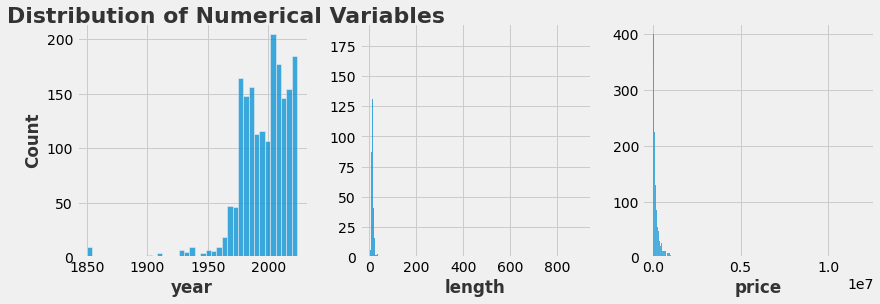

In [85]:
# Check distribution
fig, (ax1, ax2, ax3) =  plt.subplots(1, 3)
fig.set_size_inches(12, 4)
plt.tight_layout()

plt.text(-0.3, 1, "Distribution of Numerical Variables", transform=ax1.transAxes, fontsize=22, fontweight='bold')
sns.histplot(df['year'], ax=ax1)
sns.histplot(df['length'], ax=ax2)
sns.histplot(df['price'], ax=ax3)
ax2.set_ylabel("")
ax3.set_ylabel("");

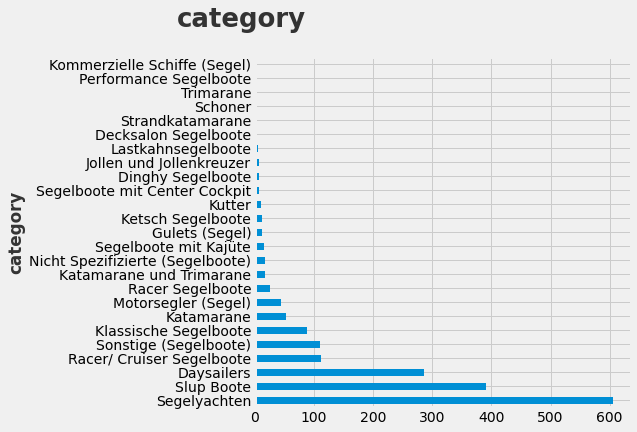

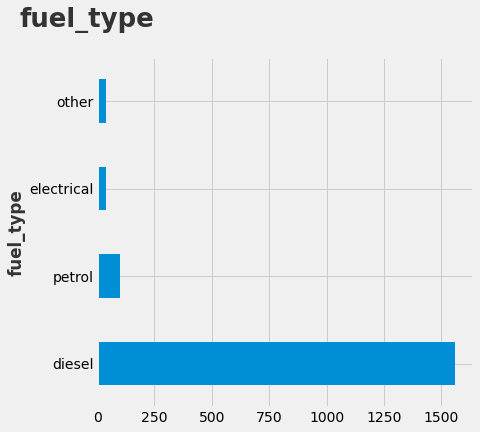

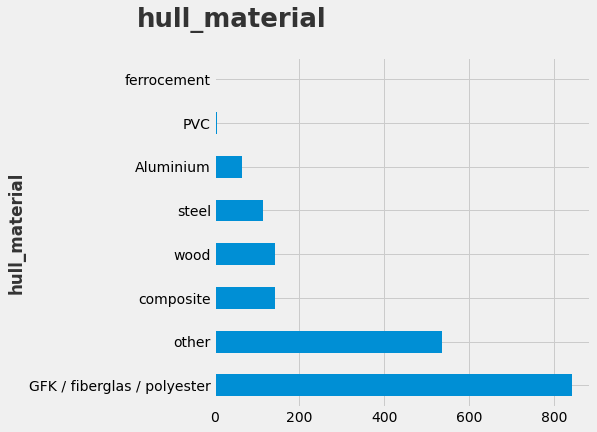

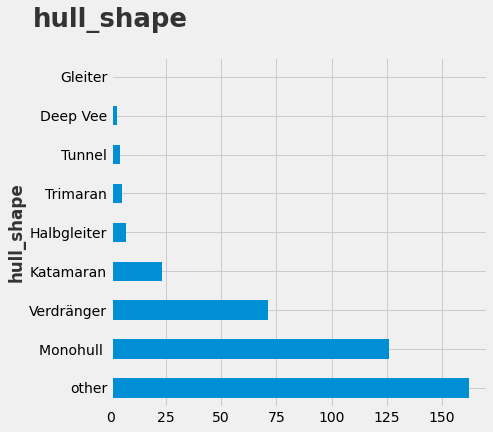

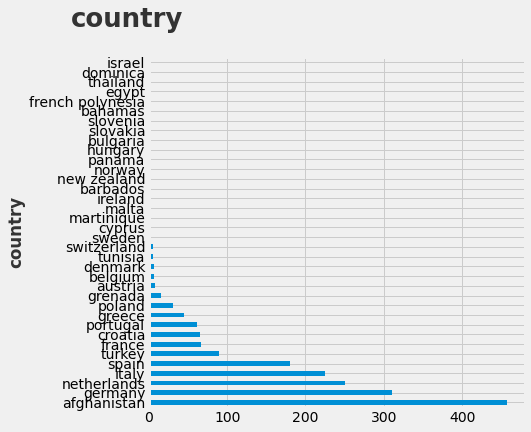

In [13]:
# Check 'category', 'fuel_type', 'hull_material', 'hull_shape', 'country'
for col in categorical_cols:
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.text(-0.1, 0.95, col, transform=fig.transFigure, fontsize=26, fontweight='bold')
    df.value_counts(col, ascending=False).plot(kind='barh');

### **4. Exploratory Data Analysis**  
* Univariate and Bivariate Analysis
* Missing Value Analysis
* Outlier Handling  
[(Go to Top)](#Top)

#### Univariate Analysis
* The overall average price is 247605.08, while its median is 95000
* The average of length is 13.34 with the max of 900
* The sales volume drastically increased in the middle of 1970's


* The highest sales volume of 95 was recorded in 2022
* GFK / fiberglas / ployester is the most sold ship material. 843 ships were sold  
[(Go to Top)](#Top)

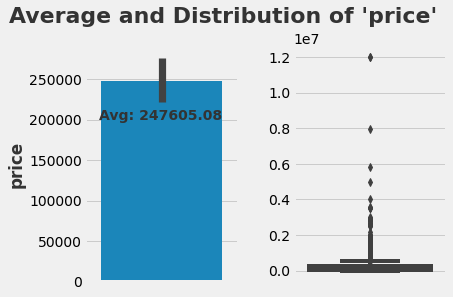

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(6, 4)
plt.tight_layout()
plt.text(-0.5, 1.1, "Average and Distribution of 'price'", transform=ax1.transAxes, fontsize=22, fontweight='bold')
avg_price = round(df['price'].mean(), 2)
plt.text(-1.78, 8500000, f"Avg: {avg_price}" , fontsize=14, fontweight='bold')
sns.barplot(y=df['price'], ax=ax1)
sns.boxplot(y=df['price'], ax=ax2)
ax2.set_ylabel("");

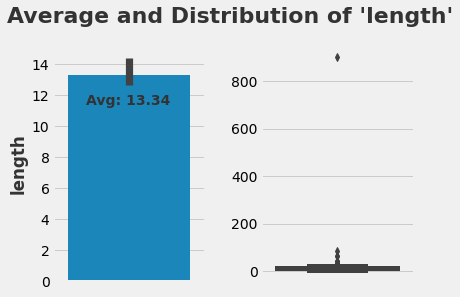

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(6, 4)
plt.tight_layout()
plt.text(-0.3, 1.1, "Average and Distribution of 'length'", transform=ax1.transAxes, fontsize=22, fontweight='bold')
avg_length = round(df['length'].mean(), 2)
plt.text(-1.65, 700, f"Avg: {avg_length}" , fontsize=14, fontweight='bold')
sns.barplot(y=df['length'], ax=ax1)
sns.boxplot(y=df['length'], ax=ax2)
ax2.set_ylabel("");

In [128]:
# Sales volume by year
sales_volume_by_year = df.groupby('year')['year'].count().sort_values(ascending=False)
# Average sales volume by year
avg_sales_by_year = sales_volume_by_year.mean()

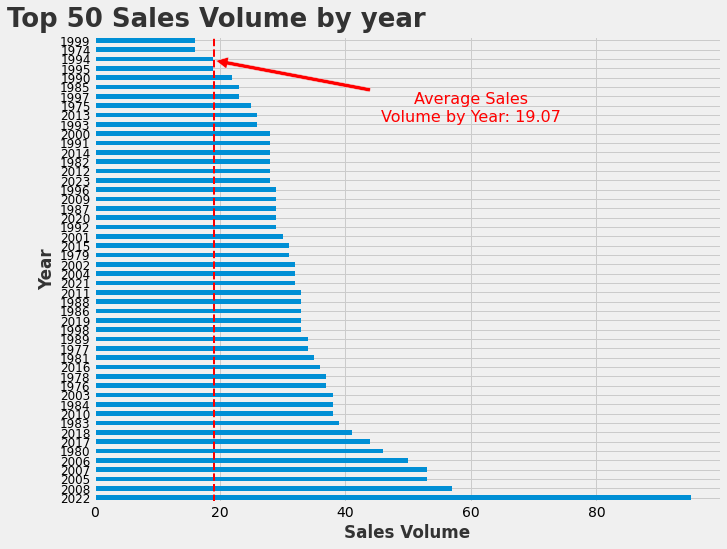

In [171]:
fig, ax =  plt.subplots(figsize=(10, 8))
plt.suptitle("Top 50 Sales Volume by year", x=0.25, y=0.93, fontsize=26, fontweight='bold')
ax.annotate(f'Average Sales\nVolume by Year: {avg_sales_by_year:.2f}', (18, 47),
             xytext=(60, 40), arrowprops=dict(facecolor='r',shrink=0.05),
             fontsize=16, color='r', horizontalalignment='center', verticalalignment='bottom')

bar1 = sales_volume_by_year[:50].plot(kind='barh')
ax.axvline(avg_sales_by_year, ls='--', lw=2, color='r')
ax.set_xlabel("Sales Volume")
ax.set_ylabel("Year")
fontdict = {'fontsize': 12}
ax.set_yticklabels(bar1.get_yticklabels(), fontdict=fontdict);

In [16]:
# Number sold by material
number_sold_by_material = df.groupby('hull_material')[['price', 'length']].count().reset_index().sort_values('price')

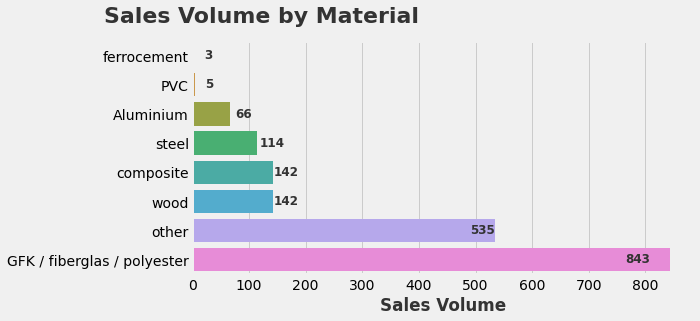

In [17]:
fig, ax =  plt.subplots(figsize=(8, 4))
plt.suptitle("Sales Volume by Material", x=0.2, y=1, fontsize=22, fontweight='bold')

plt1 = sns.barplot(x='price', y='hull_material', data=number_sold_by_material, ax=ax)
ax.set_xlabel("Sales Volume")
ax.set_ylabel("")

count = number_sold_by_material['price'].to_list()
materials = number_sold_by_material['hull_material'].to_list()
for i in range(len(materials)):
    plt.text(count[i]/1000+0.02, (7.4-i)/len(materials), count[i], 
             transform=ax.transAxes, fontsize=12, fontweight='bold');

#### Bivariate Analysis
* The sales volume started increasing in 1960's and drastically increased from 1970's
* The average ship prices before and after 2000 were 116634.16 and 378575.99 respectively
* Interestingly, the sales volume before and after 2000 are equal of 925 
* 3,500,000 is the highest yearly average sales, recorded in 1911
* Ferrocement was recorded the highest average price of 2,664,167
* The ships with the highest price of 12,000,000 are made with steel
* The ship with a maximum length of 900 was made with steel
* After 1975, a variety of the material increased 
* The average prices of ferrocement, aluminum, and GFK / fiberglas / polyester increased
* After 1975, ship sales volume increased
* GFK / fiberglas / polyester is the most popular material after 1975  
[(Go to Top)](#Top)

In [18]:
# Get average prices and number of ships sold for each year
price_by_year = df.groupby('year')[['price']].mean().sort_values('price', ascending=False).reset_index()
number_by_year = df.groupby('year')[['price']].count().sort_values('price', ascending=False).reset_index()

# Get years for max average price and the number of ships sold the most
max_avg_price = price_by_year.sort_values('price', ascending=False).iloc[0, 1]
max_avg_price_year = price_by_year.sort_values('price', ascending=False).iloc[0, 0]
max_number = number_by_year.sort_values('price', ascending=False).iloc[0, 1]
max_number_year = number_by_year.sort_values('price', ascending=False).iloc[0, 0]

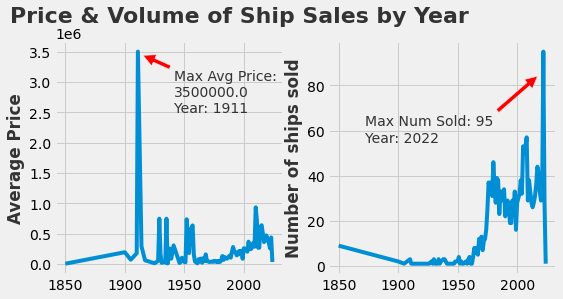

In [19]:
# Average price by year
fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(8, 4))
plt.suptitle("Price & Volume of Ship Sales by Year", x=0.4, y=1, fontsize=22, fontweight='bold')
ax1.annotate(f'Max Avg Price:\n{max_avg_price}\nYear: {max_avg_price_year}', 
             xy =(max_avg_price_year+3, max_avg_price-50000),
             xytext =(max_avg_price_year+30, max_avg_price-1000000), 
             arrowprops = dict(facecolor ='red', shrink = 0.05),)
ax2.annotate(f'Max Num Sold: {max_number}\nYear: {max_number_year}', 
             xy =(max_number_year-3, max_number-10),
             xytext =(max_number_year-150, max_number-40), 
             arrowprops = dict(facecolor ='red', shrink = 0.05),)


sns.lineplot('year', 'price', data=price_by_year, ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("Average Price")
sns.lineplot('year', 'price', data=number_by_year, ax=ax2)
ax2.set_xlabel("")
ax2.set_ylabel("Number of ships sold");

In [20]:
df_year_price = df[['price', 'year']]
df_year_price['before_2000'] = df_year_price['year'] < 2000

avg_price = df_year_price.groupby('before_2000')[['price']].mean().reset_index()
number_ships = df_year_price.groupby('before_2000')[['price']].count().reset_index()

avg_price_after_2000 = round(avg_price['price'][0], 2)
avg_price_before_2000 = round(avg_price['price'][1], 2)

number_after_2000 = number_ships['price'][0]
number_before_2000 = number_ships['price'][1]

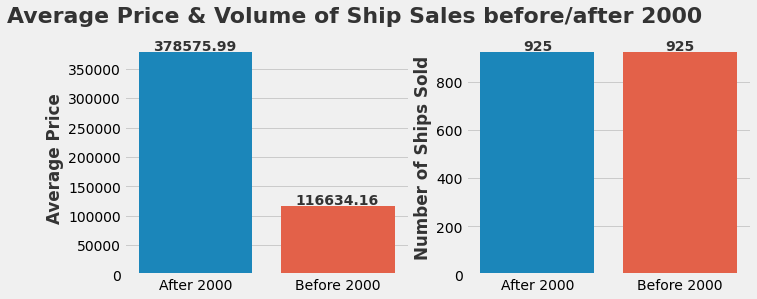

In [21]:
# Visualize the average prices and numbers of ships sold before and after 2000
fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(10, 4))

plt.suptitle("Average Price & Volume of Ship Sales before/after 2000", x=0.4, y=1, fontsize=22, fontweight='bold')

sns.barplot('before_2000', 'price', data=avg_price, ax=ax1)
plt.text(0.1, 0.96, avg_price_after_2000, transform=ax1.transAxes, fontsize=14, fontweight='bold')
plt.text(0.6, 0.3, avg_price_before_2000, transform=ax1.transAxes, fontsize=14, fontweight='bold')
ax1.set_xlabel("")
ax1.set_ylabel("Average Price")
ax1.set_xticklabels(['After 2000',  'Before 2000'])

sns.barplot('before_2000', 'price', data=number_ships, ax=ax2)
plt.text(0.2, 0.96, number_after_2000, transform=ax2.transAxes, fontsize=14, fontweight='bold')
plt.text(0.7, 0.96, number_before_2000, transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax2.set_xlabel("")
ax2.set_ylabel("Number of Ships Sold")
ax2.set_xticklabels(['After 2000',  'Before 2000']);

In [22]:
number_ships_material = df.groupby('hull_material')[['price', 'length']].count().reset_index().sort_values('price')
avg_price_material = df.groupby('hull_material')[['price', 'length']].mean().reset_index().sort_values('price')
avg_price = round(np.mean(df['price']), 2)

In [23]:
avg_price_material.sort_values('price', ascending=False)

,hull_material,price,length
4,ferrocement,2.664167e+06,20.866667
0,Aluminium,6.142046e+05,16.909545
6,steel,4.599432e+05,23.943947
7,wood,4.229650e+05,16.317817
3,composite,2.622289e+05,12.024718
1,GFK / fiberglas / polyester,1.899013e+05,11.918826
5,other,1.849365e+05,12.414393
2,PVC,1.561066e+05,11.446000


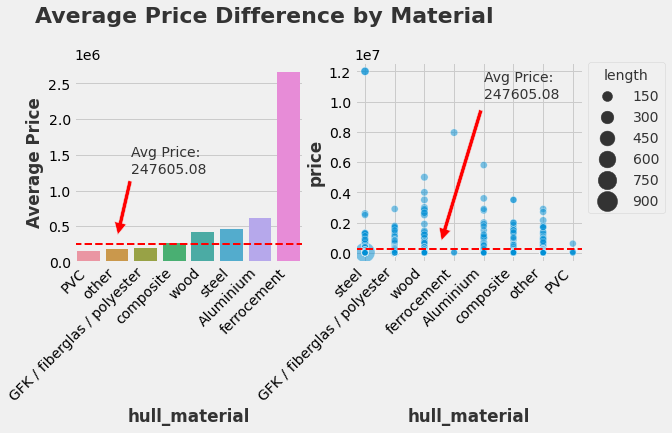

In [24]:
fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(8, 4))
plt.suptitle("Average Price Difference by Material", x=0.4, y=1, fontsize=22, fontweight='bold')
plt.tight_layout()
ax1.annotate(f'Avg Price:\n{avg_price}', 
             xy =(1, avg_price+90000),
             xytext =(1.5, avg_price+1000000), 
             arrowprops = dict(facecolor ='red', shrink = 0.05),)
ax2.annotate(f'Avg Price:\n{avg_price}', 
             xy =(2.5, avg_price+80000),
             xytext =(4, avg_price+10000000), 
             arrowprops = dict(facecolor ='red', shrink = 0.05),)             
ax1.axhline(avg_price, ls='--', lw=2, color='r')
ax2.axhline(avg_price, ls='--', lw=2, color='r')

plt1 = sns.barplot(x='hull_material', y='price', data=avg_price_material, ax=ax1)
plt2 = sns.scatterplot(x='hull_material', y='price', data=df, size='length', ax=ax2, sizes=(40, 400), alpha=0.5)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45, ha='right')
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel("Average Price")
plt.legend(title='length', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

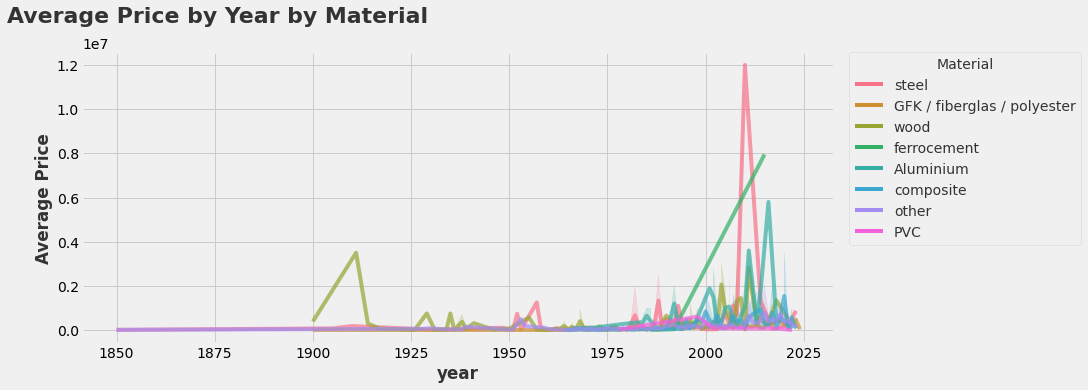

In [25]:
fig, ax =  plt.subplots(figsize=(12, 5))
plt.text(-0.1, 1.1, "Average Price by Year by Material", transform=ax.transAxes, fontsize=22, fontweight='bold')
sns.lineplot('year', 'price', data=df, ax=ax, hue='hull_material', alpha=0.7)
ax.set_ylabel("Average Price")
plt.legend(title='Material', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [26]:
df_year_material = df.groupby(['year', 'hull_material'])[['price']].count().reset_index().sort_values('price', ascending=False)
df_year_material.head(10)

,year,hull_material,price
343,2022,GFK / fiberglas / polyester,66
320,2017,GFK / fiberglas / polyester,28
263,2006,GFK / fiberglas / polyester,28
275,2008,GFK / fiberglas / polyester,26
331,2019,GFK / fiberglas / polyester,25
337,2021,GFK / fiberglas / polyester,25
325,2018,GFK / fiberglas / polyester,24
347,2023,GFK / fiberglas / polyester,24
120,1980,GFK / fiberglas / polyester,23
259,2005,other,22


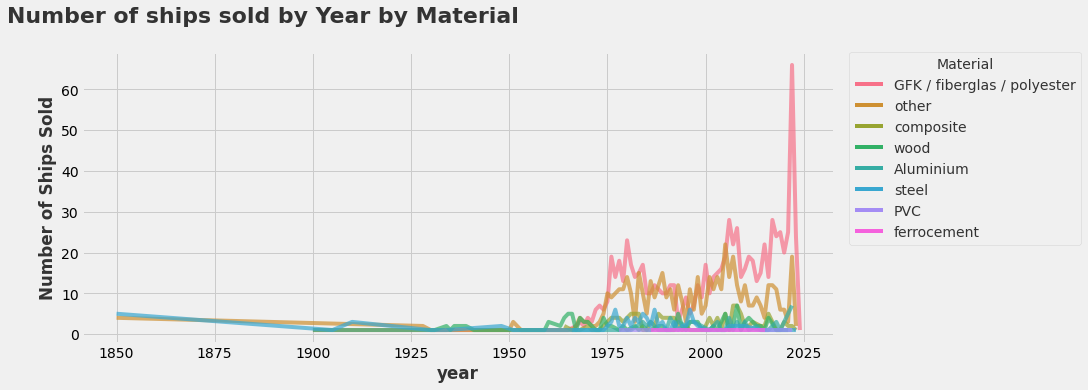

In [27]:
fig, ax =  plt.subplots(figsize=(12, 5))

plt.text(-0.1, 1.1, "Number of ships sold by Year by Material", transform=ax.transAxes, fontsize=22, fontweight='bold')

sns.lineplot('year', 'price', data=df_year_material, ax=ax, hue='hull_material', alpha=0.7)
ax.set_ylabel("Number of Ships Sold")
plt.legend(title='Material', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

### **5. Text preprocessing**
* Import modules
* Clean the text in 'description'
* Create a new columns, 'number_words_descrition_cleaned' and 'ADJECTIVE_COUNT' 
* The both word count in 'description_cleaned' and 'ADJECTIVE_COUNT' are right skewed<br>
[(Go to Top)](#Top)

#### Clean test in 'description'

In [28]:
# Import modules
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
en_stopwords = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cutey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cutey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Check the first values in 'Description'
print("\nFirst 10 Rows of 'Description'")
df['description'][:10]


First 10 Rows of 'Description'


0    General: The Zeegrundel was originally designe...
1    Selling a well-preserved and equipped sailing ...
2    Model: VAN DER GRAAF CLASSIC SCHOONER Type: sa...
3    Price On Application\n \nThe current ATLANTIC ...
4    A beautiful 43m Gulet classic luxury style bui...
5       Make: BODRUM Model: Custom Year: 2015Show more
6    Model: FJELLSTRAND DSC PASSENGER CATAMARAN Typ...
7    Designed and built by William Fife, "Mariquita...
8    Model: SCHOONER ELDORADO Type: sailing yacht L...
9    ARIADNE, a 37.49m sailing yacht built in Greec...
Name: description, dtype: object

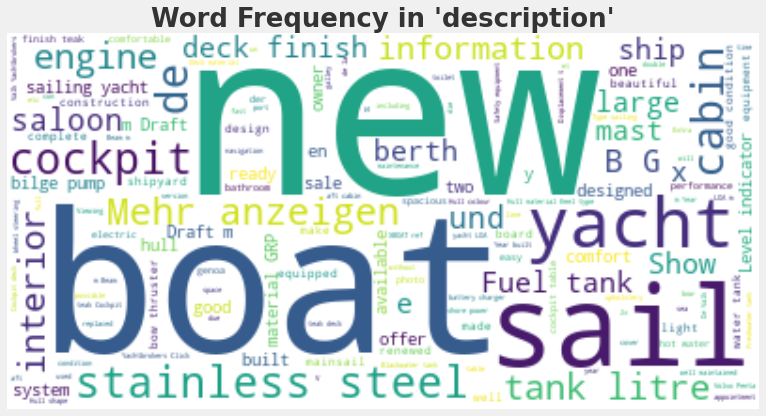

In [30]:
# Visualize word frequency in 'description'
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(" ".join(df['description']))
plt.figure( figsize=(12, 10))
plt.title("Word Frequency in 'description'", fontsize=26, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [31]:
# 1. Convert all characters to lowercase
def text_to_lower(txt):
    """
    Returns the string with lowercase
        Parameters:
            txt (str)
        Returns:
            txt.lower (str): str converted to lowercase
    """
    return txt.lower()
    
# 2. Remove special characters, numbers and URLs
def remove_nums_special_chars(txt):
    """
    Returns the string removed all numbers and special characters
        Parameters:
            txt (str)
        Returns:
            txt_leaned (str): Strings only contains alphabets and spaces
    """
    alpha_pattern = re.compile(r"[a-zA-Z]+")
    txt_cleaned = " ".join(alpha_pattern.findall(str(txt)))
    return txt_cleaned  
# 3. Remove stopwords
def remove_stopwords(txt):
    """
    Returns the string removed all numbers and special characters
        Parameters:
            txt (str)
        Returns:
            txt_tokenized (str): str of txt removed stopwords
    """
    en_stopwords = nltk.corpus.stopwords.words('english')
    txt_wo_stopwords = ' '.join([word for word in txt.split() if word not in en_stopwords])
    return txt_wo_stopwords
# 4. Lemmatize words
def lemmatize_text(txt):
    """
    Returns the lemmitized string
        Parameters:
            txt (str)
        Returns:
            lemmatized_text (str): list of strings
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in txt.split()])
    return lemmatized_text


In [32]:
# Clean df['description']
description_cleaned = []
for txt in df['description']:
    txt = text_to_lower(txt)
    txt = remove_nums_special_chars(txt)
    txt = remove_stopwords(txt)
    txt = lemmatize_text(txt)
    description_cleaned.append(txt)

#### Create new features 'ADJECTIVE_COUNT' and 'number_words_descrition_cleaned'
* Import modules
* Create a new feature,'number_words_descrition_cleaned' to hold the number of words
* Tokenize each string in 'description_cleaned'
* Tag POS for each wowrd in 'description_cleaned'
* Create a new feature 'ADJECTIVE_COUNT' to hold the number of adjective

In [34]:
from collections import Counter
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cutey\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
# Compare 'Description' and 'description_cleaned'
print(df['description'][10])
print()
print(description_cleaned[10])

37.50 m Motorsailor traditionally built -Iroko on mahogany frames
Continuously maintained and very well kept by the owners.
The boat has undergone a major refit during last year in 2019 so she is absolutely in excellent condition
Currentşy ready for inspection here in Southern Turkey
Please ask for more details..Mehr anzeigen

motorsailor traditionally built iroko mahogany frame continuously maintained well kept owner boat undergone major refit last year absolutely excellent condition current ready inspection southern turkey please ask detail mehr anzeigen


In [180]:
# Count words in 'description_cleaned'
number_words_descrition_cleaned = [len(string) for string in description_cleaned]

In [181]:
# Distribution of the word count in 'description_cleaned'
print(f"Min: {np.min(number_words_descrition_cleaned)}")
print(f"Max: {np.max(number_words_descrition_cleaned)}")
print(f"Mean: {np.mean(number_words_descrition_cleaned)}")
print(f"Median: {np.median(number_words_descrition_cleaned)}")

Min: 4
Max: 31439
Mean: 1026.365945945946
Median: 624.5


In [35]:
# Function that returns the number of occurence of the specified POS in string
def pos_counter(x,pos):
    """
    Returns the count for the given parts of speech tag
        Parameter: 
            x: string
            pos: one of the string below
    NN - Noun
    VB - Verb
    JJ - Adjective
    RB - Adverb
    """
    tokens = nltk.word_tokenize(x)
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    # tags = [('motorsailor', 'NN'), ('traditionally', 'RB'), ('built', 'VBN'),...]
    # word <-- 'motorsailor', 'traditionally', 'built'
    # tag <-- 'NN', 'RB', 'VBN'
    counts = Counter(tag for word, tag in tags)
    return counts[pos]

ADJECTIVE_COUNT = [pos_counter(string,'JJ') for string in description_cleaned]

In [36]:
# Check the first 10 values of 'ADJECTIVE_COUNT'
ADJECTIVE_COUNT[:10]

[39, 33, 31, 37, 5, 1, 31, 7, 52, 84]

In [182]:
# Distribution of the word count in 'description_cleaned'
print(f"Min: {np.min(ADJECTIVE_COUNT)}")
print(f"Max: {np.max(ADJECTIVE_COUNT)}")
print(f"Mean: {np.mean(ADJECTIVE_COUNT)}")
print(f"Median: {np.median(ADJECTIVE_COUNT)}")

Min: 0
Max: 766
Mean: 27.787567567567567
Median: 17.0


### **6. Data preprocessing**<br>
[(Go to Top)](#Top)

#### Missing Value Analysis
* 'model', 'fuel_type', and 'hull_shape' have 7, 115, and 1448 missing values respectively
* Their missing value ratios are 0.38%, 6.22%, and 78.27% respectively
* For 'model' and 'fuel_type', null values will be replaced with the most frequent values
* 'hull_shape' contains too much missing values to use, thus it will be dropped  
[(Go to Top)](#Top)

In [37]:
# Missing value Analysis
cols_check_missing_values = ['model', 'fuel_type', 'hull_shape']

for col in cols_check_missing_values:
    missing_values = df[col].isnull().sum()
    print(f"----- {col} -----")
    print(f"Number of Missing Values: {missing_values}, Ratio: {missing_values/len(df):.2%}\n")

----- model -----
Number of Missing Values: 7, Ratio: 0.38%

----- fuel_type -----
Number of Missing Values: 115, Ratio: 6.22%

----- hull_shape -----
Number of Missing Values: 1448, Ratio: 78.27%



In [38]:
# For 'model' and 'fuel_type', replace NaN with the most frequent values: 34, 'diesel'
df['model_cleaned'] = df['model'].fillna(df['model'].mode())
df['fuel_type_cleaned'] = df['fuel_type'].fillna(df['fuel_type'].mode())

In [39]:
# 'hull_shape' has missing values, thus this feature will be removed
df.drop('hull_shape', axis=1, inplace=True)

In [176]:
# Check df
df.head()

,Unnamed: 0,name,price,location,offerer,id,description,year,manufacturer,model,category,length,fuel_type,hull_material,hull_shape,country
0,0,1976 Ketch Baarda Zeegrundel1976 Ketch Baarda ...,24500.0,"dinteloord, niederlande",Sealion Yachts,8222682,General: The Zeegrundel was originally designe...,1976,Ketch,Baarda Zeegrundel,Lastkahnsegelboote,900.00,diesel,steel,NaN,netherlands
1,1,1979 Dufour 28001979 Dufour 2800,9900.0,"greifswald, deutschland",Privater Verkäufer,8457402,Selling a well-preserved and equipped sailing ...,1979,Dufour,2800,Segelboote mit Kajüte,83.00,diesel,GFK / fiberglas / polyester,NaN,germany
2,2,2010 Van der Graaf Classic Schooner2010 Van de...,12000000.0,"contact de valk antibes, frankreich",De Valk Group B.V,7936534,Model: VAN DER GRAAF CLASSIC SCHOONER Type: sa...,2010,Van der Graaf,Classic Schooner,Slup Boote,65.84,diesel,steel,NaN,france
3,3,2010 Custom Van Der Graaf BV Schooner2010 Cust...,12000000.0,"imperia, italien",Bernard Gallay Yacht Brokerage,6751543,Price On Application\n \nThe current ATLANTIC ...,2010,Custom,Van Der Graaf BV Schooner,Schoner,64.50,diesel,steel,NaN,italy
4,4,2008 Custom Build Gulet2008 Custom Build Gulet,5000000.0,türkei,Gino Group,469955,A beautiful 43m Gulet classic luxury style bui...,2008,Custom Build,Gulet,Segelyachten,42.98,diesel,wood,NaN,turkey


#### Outlier Treatment
* 'price' and 'length' are heavily right skewed
* 'price' and 'length' contain extreme outliers 
* Create 'price_cleaned' and 'length_cleaned' Series, which will be added to the dataset later

In [41]:
def get_outlier_borders(nums):
    """
    Returns the upper and lower borders
        Parameters: 
            Array like iterable of numbers
        Returns:
            Scalers of numbers that is upper border and lower border
    """
    q1, q3 = np.percentile(nums, [25, 75])
    iqr = q3 - q1
    upper_border = q3 + iqr * 1.5
    lower_border = np.min(nums)
    return lower_border, upper_border

In [42]:
# Calculate upper_border and lower_border
price_lower_border, price_upper_border = get_outlier_borders(df['price'])
length_lower_border, length_upper_border = get_outlier_borders(df['length'])

In [43]:
len(df[df['price'] > price_upper_border])/len(df)

0.09027027027027026

In [44]:
# replace outliers with upper_border and lower_border values
price_cleaned = df['price'].clip(price_lower_border, price_upper_border)
length_cleaned = df['length'].clip(length_lower_border, length_upper_border)

#### Scale 'ADJECTIVE_COUNT', 'number_words_descrition_cleaned' and 'length' using min-max, and 'price' using log scaling
* Linear regression models are affected by the magnitude of the values, so values will be normalized 
* Create a new features, length_cleaned_scaled, 'ADJECTIVE_COUNT_scaled, 'number_words_descrition_cleaned_scaled' and 'price_cleaned_log'

In [45]:
# Scale 'ADJECTIVE_COUNT'
min_ADJECTIVE_COUNT = np.min(ADJECTIVE_COUNT)
max_ADJECTIVE_COUNT = np.max(ADJECTIVE_COUNT)
ADJECTIVE_COUNT_scaled = (ADJECTIVE_COUNT - min_ADJECTIVE_COUNT) / (max_ADJECTIVE_COUNT - min_ADJECTIVE_COUNT)
ADJECTIVE_COUNT_scaled = pd.Series(ADJECTIVE_COUNT_scaled)

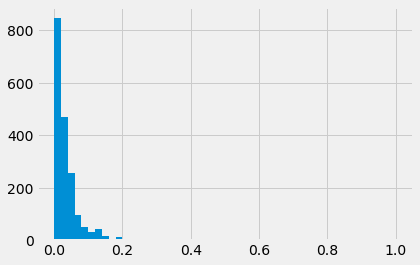

In [186]:
# Visualize the scaled ADJECTIVE_COUNT
ADJECTIVE_COUNT_scaled.hist(bins=100);

In [183]:
# Scale 'number_words_descrition_cleaned'
min_number_words_descrition_cleaned = np.min(number_words_descrition_cleaned)
max_number_words_descrition_cleaned = np.max(number_words_descrition_cleaned)
number_words_descrition_cleaned_scaled = (number_words_descrition_cleaned - min_number_words_descrition_cleaned) / (max_number_words_descrition_cleaned - min_number_words_descrition_cleaned)
number_words_descrition_cleaned_scaled = pd.Series(number_words_descrition_cleaned_scaled)

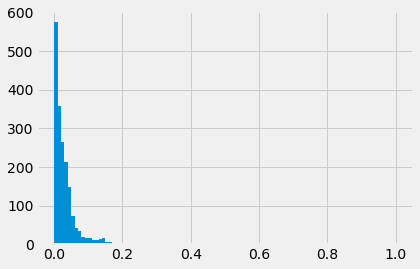

In [187]:
# Visualize the scaled ADJECTIVE_COUNT
number_words_descrition_cleaned_scaled.hist(bins=100);

In [47]:
# Scale 'length'
min_length = length_cleaned.min()
max_length = length_cleaned.max()
length_cleaned_scaled = (length_cleaned - min_length) / (max_length - min_length)

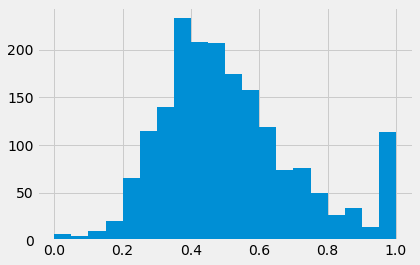

In [48]:
# Visualize the scaled length
length_cleaned_scaled.hist(bins=20);

In [49]:
# log scaled 'price_cleaned'
price_cleaned_log = np.log(price_cleaned + 1)

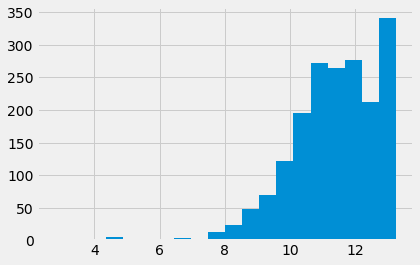

In [50]:
# Visualize the scaled price_cleaned_log
price_cleaned_log.hist(bins=20);

#### One-hot Encoding
* 'category', 'hull_material' and 'fuel_type_cleaned' contain 25, 8 and 4 unique categforical values respectively
* Convert those categorical values to numerical values using one-hot encoding
* Create new features 'before_1900', 'from_1900_to_1949', 'from_1950_to_1999', and 'after_2000'

In [51]:
# One-hot encode 'category'
df_ohe_category = pd.get_dummies(df['category'], prefix='category')
df_ohe_category.head()

,category_Daysailers,category_Decksalon Segelboote,category_Dinghy Segelboote,category_Gulets (Segel),category_Jollen und Jollenkreuzer,category_Katamarane,category_Katamarane und Trimarane,category_Ketsch Segelboote,category_Klassische Segelboote,category_Kommerzielle Schiffe (Segel),category_Kutter,category_Lastkahnsegelboote,category_Motorsegler (Segel),category_Nicht Spezifizierte (Segelboote),category_Performance Segelboote,category_Racer Segelboote,category_Racer/ Cruiser Segelboote,category_Schoner,category_Segelboote mit Center Cockpit,category_Segelboote mit Kajüte,category_Segelyachten,category_Slup Boote,category_Sonstige (Segelboote),category_Strandkatamarane,category_Trimarane
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [52]:
# One-hot encode 'hull_material'
df_ohe_hull = pd.get_dummies(df['hull_material'], prefix='hull_material')
df_ohe_hull.head()

,hull_material_Aluminium,hull_material_GFK / fiberglas / polyester,hull_material_PVC,hull_material_composite,hull_material_ferrocement,hull_material_other,hull_material_steel,hull_material_wood
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1


In [53]:
# One-hot encode 'fuel_type'
df_ohe_fuel = pd.get_dummies(df['fuel_type'], prefix='fuel_type')
df_ohe_fuel.head()

,fuel_type_diesel,fuel_type_electrical,fuel_type_other,fuel_type_petrol
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [54]:
# Concatenate 'hull_material' and 'fuel_type'
df_ohe = pd.concat([df_ohe_category, df_ohe_hull, df_ohe_fuel], axis=1)

In [55]:
# Check df_ohe
df_ohe.head()

,category_Daysailers,category_Decksalon Segelboote,category_Dinghy Segelboote,category_Gulets (Segel),category_Jollen und Jollenkreuzer,category_Katamarane,category_Katamarane und Trimarane,category_Ketsch Segelboote,category_Klassische Segelboote,category_Kommerzielle Schiffe (Segel),category_Kutter,category_Lastkahnsegelboote,category_Motorsegler (Segel),category_Nicht Spezifizierte (Segelboote),category_Performance Segelboote,category_Racer Segelboote,category_Racer/ Cruiser Segelboote,category_Schoner,category_Segelboote mit Center Cockpit,category_Segelboote mit Kajüte,category_Segelyachten,category_Slup Boote,category_Sonstige (Segelboote),category_Strandkatamarane,category_Trimarane,hull_material_Aluminium,hull_material_GFK / fiberglas / polyester,hull_material_PVC,hull_material_composite,hull_material_ferrocement,hull_material_other,hull_material_steel,hull_material_wood,fuel_type_diesel,fuel_type_electrical,fuel_type_other,fuel_type_petrol
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [56]:
# Create a new features to devide 'year' into 4
before_1900 = (df['year'] < 1900).astype(int)
from_1900_to_1949 = ((df['year'] >= 1900) & (df['year'] < 1950)).astype(int)
from_1950_to_1999 = ((df['year'] >= 1950) & (df['year'] < 2000)).astype(int)
after_2000 = (df['year'] >= 2000).astype(int)

### **7. Finalize Dataset**
* Remove unnescesarry columns: 'Unnamed: 0', 'name', and 'id'
* Concatenate df_cleaned and df_concat
* Add ADJECTIVE_COUNT_scaled, number_words_descrition_cleaned_scaled, price_cleaned_scaled, year_scaled and length_cleaned_scaled to df_ohe
* description_cleaned will be vectorized later  
[(Go to Top)](#Top)

In [206]:
# Add description_cleaned, price_cleaned_scaled, year_scaled and length_cleaned_scaled to df_ohe
cols_to_add = [ADJECTIVE_COUNT_scaled, length_cleaned_scaled, 
               before_1900, from_1900_to_1949, from_1950_to_1999, after_2000]
cols_names = ['ADJECTIVE_COUNT_scaled', 'length_cleaned_scaled',
               'before_1900', 'from_1900_to_1949', 'from_1950_to_1999', 'after_2000']
for i in range(len(cols_to_add)):
    df_ohe[cols_names[i]] = cols_to_add[i]

In [207]:
df_ohe.head()

,category_Daysailers,category_Decksalon Segelboote,category_Dinghy Segelboote,category_Gulets (Segel),category_Jollen und Jollenkreuzer,category_Katamarane,category_Katamarane und Trimarane,category_Ketsch Segelboote,category_Klassische Segelboote,category_Kommerzielle Schiffe (Segel),category_Kutter,category_Lastkahnsegelboote,category_Motorsegler (Segel),category_Nicht Spezifizierte (Segelboote),category_Performance Segelboote,category_Racer Segelboote,category_Racer/ Cruiser Segelboote,category_Schoner,category_Segelboote mit Center Cockpit,category_Segelboote mit Kajüte,category_Segelyachten,category_Slup Boote,category_Sonstige (Segelboote),category_Strandkatamarane,category_Trimarane,hull_material_Aluminium,hull_material_GFK / fiberglas / polyester,hull_material_PVC,hull_material_composite,hull_material_ferrocement,hull_material_other,hull_material_steel,hull_material_wood,fuel_type_diesel,fuel_type_electrical,fuel_type_other,fuel_type_petrol,ADJECTIVE_COUNT_scaled,length_cleaned_scaled,before_1900,from_1900_to_1949,from_1950_to_1999,after_2000,number_words_descrition_cleaned_scaled
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.050914,1.0,0,0,1,0,0.047558
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.043081,1.0,0,0,1,0,0.038588
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.040470,1.0,0,0,0,1,0.030444
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.048303,1.0,0,0,0,1,0.039224
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.006527,1.0,0,0,0,1,0.007189


In [212]:
# Check the shpe of df_ohe
df_ohe.shape

(1850, 43)

In [213]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   category_Daysailers                        1850 non-null   uint8  
 1   category_Decksalon Segelboote              1850 non-null   uint8  
 2   category_Dinghy Segelboote                 1850 non-null   uint8  
 3   category_Gulets (Segel)                    1850 non-null   uint8  
 4   category_Jollen und Jollenkreuzer          1850 non-null   uint8  
 5   category_Katamarane                        1850 non-null   uint8  
 6   category_Katamarane und Trimarane          1850 non-null   uint8  
 7   category_Ketsch Segelboote                 1850 non-null   uint8  
 8   category_Klassische Segelboote             1850 non-null   uint8  
 9   category_Kommerzielle Schiffe (Segel)      1850 non-null   uint8  
 10  category_Kutter         

In [214]:
# Save df_finalized to Pune Real Estate Data_final.csv
df_ohe.to_csv(r"data/online_ship_listing_data_final.csv")

### **8. Linear Regression Model Creation** 
1. Import modules
2. Vectorize 'description_cleaned' and create df_vecor data frame
3. Split the dataset into train and test 
4. Create Linear Regression, Lasso and Ridge models  
[(Go to Top)](#Top)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
# Vectorize and fit the train data
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100).fit(description_cleaned)
X = vectorizer.transform(description_cleaned)

In [65]:
# Create vector dataframe
df_vector = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_vector.head()

,aft cabin,air draft,anchor chain,antifouling year,bathing ladder,battery ah,battery charger,bavaria cruiser,beam draft,bilge pump,bilged keel,blackwater tank,bow thruster,built builder,cabin bathroom,ce norm,chart plotter,chart table,click mehr,cockpit deck,cockpit table,de la,de valk,deck finish,deck material,depth sounder,draft headroom,electric water,electric windlass,emergency tiller,engine electric,extra info,finish non,finish teak,freshwater tank,frmehr anzeigen,fuel tank,fully equipped,furling genoa,furling jib,furling system,good condition,grp deck,grp hull,headroom year,helm position,hot water,hull colour,hull material,hull shape,indicator freshwater,indicator fuel,information photo,keel type,lazy bag,lazy jack,level indicator,loa lwl,material grp,mehr anzeigen,mooring line,non skid,photo site,please contact,radar reflector,ready sail,remote control,safety equipment,sailing yacht,sale de,shore power,site xboat,solar panel,stainless steel,steel level,steering wheel,storage space,sun odyssey,superstructure deck,superstructure material,tank litre,tank yes,teak cockpit,teak deck,tiller yes,type sailing,valk yachtbrokers,viewing appointment,volvo penta,water system,water tank,well maintained,wheel steering,window frame,window material,xboat frmehr,xboat ref,yacht loa,yachtbrokers click,year built
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,2,1,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,1,4,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [215]:
# Concatenate df_ohe and df_vector
df_vectorized = pd.concat([df_ohe.reset_index(drop=True), df_vector.reset_index(drop=True)], axis=1) 

In [216]:
# Save df_finalized to Pune Real Estate Data_final.csv
df_vectorized.to_csv(r"data/online_ship_listing_data_vectorized3.csv")

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [195]:
df_vectorized.head()

,category_Daysailers,category_Decksalon Segelboote,category_Dinghy Segelboote,category_Gulets (Segel),category_Jollen und Jollenkreuzer,category_Katamarane,category_Katamarane und Trimarane,category_Ketsch Segelboote,category_Klassische Segelboote,category_Kommerzielle Schiffe (Segel),category_Kutter,category_Lastkahnsegelboote,category_Motorsegler (Segel),category_Nicht Spezifizierte (Segelboote),category_Performance Segelboote,category_Racer Segelboote,category_Racer/ Cruiser Segelboote,category_Schoner,category_Segelboote mit Center Cockpit,category_Segelboote mit Kajüte,category_Segelyachten,category_Slup Boote,category_Sonstige (Segelboote),category_Strandkatamarane,category_Trimarane,hull_material_Aluminium,hull_material_GFK / fiberglas / polyester,hull_material_PVC,hull_material_composite,hull_material_ferrocement,hull_material_other,hull_material_steel,hull_material_wood,fuel_type_diesel,fuel_type_electrical,fuel_type_other,fuel_type_petrol,ADJECTIVE_COUNT_scaled,length_cleaned_scaled,before_1900,from_1900_to_1949,from_1950_to_1999,after_2000,number_words_descrition_cleaned_scaled,aft cabin,air draft,anchor chain,antifouling year,bathing ladder,battery ah,battery charger,bavaria cruiser,beam draft,bilge pump,bilged keel,blackwater tank,bow thruster,built builder,cabin bathroom,ce norm,chart plotter,chart table,click mehr,cockpit deck,cockpit table,de la,de valk,deck finish,deck material,depth sounder,draft headroom,electric water,electric windlass,emergency tiller,engine electric,extra info,finish non,finish teak,freshwater tank,frmehr anzeigen,fuel tank,fully equipped,furling genoa,furling jib,furling system,good condition,grp deck,grp hull,headroom year,helm position,hot water,hull colour,hull material,hull shape,indicator freshwater,indicator fuel,information photo,keel type,lazy bag,lazy jack,level indicator,loa lwl,material grp,mehr anzeigen,mooring line,non skid,photo site,please contact,radar reflector,ready sail,remote control,safety equipment,sailing yacht,sale de,shore power,site xboat,solar panel,stainless steel,steel level,steering wheel,storage space,sun odyssey,superstructure deck,superstructure material,tank litre,tank yes,teak cockpit,teak deck,tiller yes,type sailing,valk yachtbrokers,viewing appointment,volvo penta,water system,water tank,well maintained,wheel steering,window frame,window material,xboat frmehr,xboat ref,yacht loa,yachtbrokers click,year built
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.050914,1.0,0,0,1,0,0.047558,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.043081,1.0,0,0,1,0,0.038588,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.040470,1.0,0,0,0,1,0.030444,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,2,1,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,1,4,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.048303,1.0,0,0,0,1,0.039224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.006527,1.0,0,0,0,1,0.007189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [217]:
# Create X and y for feature dataframe and target variable
X = df_vectorized
y = price_cleaned_log

In [232]:
# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [250]:
# Create modells
lr = LinearRegression()
lasso = Lasso(alpha=0.001)
ridge = Ridge()
models = [lr, lasso, ridge]
trained_models = []         # Trained models

predictions_train= []       # Train prediction
predictions_test = []       # Test prediction

model_score_train = []      # Train score
model_score_test = []       # Test score
model_r2score = []          # Test R2 score
model_mae = []              # Test MAE
model_mse = []              # Test MSE

for model in models:
    regression_model = model.fit(X_train, y_train)
    trained_models.append(regression_model)

    y_pred_train = regression_model.predict(X_train)
    y_pred = regression_model.predict(X_test)
    predictions_train.append(y_pred_train)
    predictions_test.append(y_pred)
    
    model_score_train.append(model.score(X_train, y_train))
    model_score_test.append(model.score(X_test, y_test))

    model_r2score.append(r2_score(y_test, y_pred))
    model_mae.append(mean_absolute_error(y_test, y_pred))
    model_mse.append(mean_squared_error(y_test, y_pred))

### **9. Model Performance Evaluation**
* R2 score, MAE, and MSE are calculated for Linear Regression, Lasso and Ridge
* The Lasso model with alpha of 0.01 showed the highest performance of R2 score of 0.7579, MAE of 0.46 and MSE of 0.40.
* The Linear Regression model is the second of R2  score of 0.7548, MAE of 0.47 and MSE of 0.41.
* The Ridge model shows the lowest R2 score with 0.7538, MAE of 0.47 and MSE of 0.41.
* The Lasso model explains 76% of the variation using input variables.  
[(Go to Top)](#Top)

In [251]:
# Check each model's performance
lr_models = ['Linear Regression', 'Lasso', 'Ridge']
for i in range(len(lr_models)):
    print(f"------ {lr_models[i]} ------")
    print(f"Train Score: {model_score_train[i]:.4f}")
    print(f"Test Score: {model_score_test[i]:.4f}")
    print(f"Test R2 Score: {model_r2score[i]:.4f}")
    print(f"Test MAE: {model_mae[i]:.4f}")
    print(f"Test MSE: {model_mse[i]:.4f}\n")

------ Linear Regression ------
Train Score: 0.7799
Test Score: 0.7548
Test R2 Score: 0.7548
Test MAE: 0.4682
Test MSE: 0.4076

------ Lasso ------
Train Score: 0.7742
Test Score: 0.7579
Test R2 Score: 0.7579
Test MAE: 0.4623
Test MSE: 0.4026

------ Ridge ------
Train Score: 0.7798
Test Score: 0.7538
Test R2 Score: 0.7538
Test MAE: 0.4679
Test MSE: 0.4094



In [252]:
for i in range(len(models)):
    print("------- ", lr_models[i], " --------")
    print(f"Intercetp: {models[i].intercept_}\n")

-------  Linear Regression  --------
Intercetp: -9390064029637.238

-------  Lasso  --------
Intercetp: 8.067141026910644

-------  Ridge  --------
Intercetp: 7.800843801259516



In [253]:
# Check model's coefficients and corresponding features
dfs = []
for model in models:
    df_lr = pd.DataFrame(zip(model.coef_.T, X_train.columns), columns=['coefficient', 'feature'])
    dfs.append(df_lr)

In [254]:
# Display the 5 highest coefficients and corresponding feature of the Ridge model
for i in range(len(dfs)):
    print("------- ", lr_models[i], " --------")
    print(dfs[i].sort_values('coefficient', ascending=False).head(),"\n")

-------  Linear Regression  --------
     coefficient                            feature
24  1.189750e+13                 category_Trimarane
23  1.189750e+13          category_Strandkatamarane
5   1.189750e+13                category_Katamarane
6   1.189750e+13  category_Katamarane und Trimarane
14  1.189750e+13    category_Performance Segelboote 

-------  Lasso  --------
    coefficient                feature
38     4.248715  length_cleaned_scaled
42     0.902702             after_2000
33     0.546766       fuel_type_diesel
24     0.540733     category_Trimarane
5      0.505899    category_Katamarane 

-------  Ridge  --------
    coefficient                    feature
38     4.152949      length_cleaned_scaled
42     1.051469                 after_2000
24     0.804930         category_Trimarane
23     0.712761  category_Strandkatamarane
33     0.662085           fuel_type_diesel 



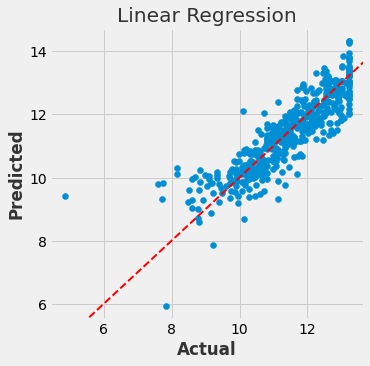

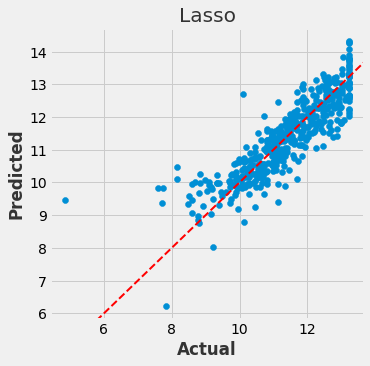

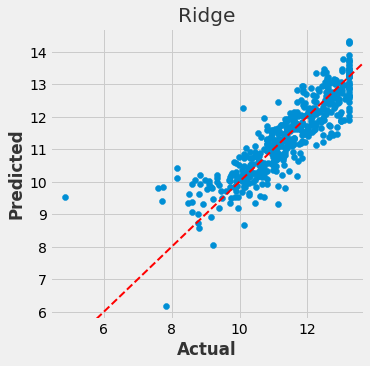

In [255]:
# Plotting the predicted and actual data 
for i in range(len(predictions_test)):
    plt.figure(figsize=(5, 5))
    plt.title(lr_models[i])
    #plt.scatter(X_train, y_train, color='r')
    plt.scatter(y_test, predictions_test[i])
    # plt.scatter(X_test, predictions[i])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    
    x = y = plt.xlim()
    plt.plot(x, y, linestyle='--', color='r', lw=2, scalex=False, scaley=False);

### **10. Confidence Interval**  
[(Go to Top)](#Top)

In [78]:
from scipy.stats import norm

#### Back transform scaled price

In [256]:
# 'price_cleaned_log' was scaled using log scaling, thus it needs to be back transformed
# Restore the actual values
backtransformed_cleaned_price = np.exp(y_test)

# Restore the predicted values
backtransformed_predicted_price = []
for predict in predictions_test:
    backtransformed_predicted_price.append(np.exp(predict))

#### Calculate lower and upper boundary of 95% confidence interval

In [260]:
# Calculate the lower and upper interval
pi = .95
one_minus_pi = 1 - pi
# If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
ppf_lookup = 1 - (one_minus_pi / 2) 
# This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
z_score = norm.ppf(ppf_lookup) 

df_models = []

for predict_price in backtransformed_predicted_price:
    sum_errs = np.sum((backtransformed_cleaned_price - predict_price)**2)
    stdev = np.sqrt(sum_errs / (len(backtransformed_cleaned_price) - 1))
    interval = z_score * stdev
    #generate prediction interval lower and upper bound
    lower, upper = np.where(predict_price - interval > 0, predict_price - interval, 0), predict_price + interval
    # getting prediction intervals for the test data
    lower_vet, upper_vet = lower, upper

    df_model = pd.DataFrame(zip(lower_vet, upper_vet, predict_price.reshape(-1).tolist()),columns=['lower','upper','mean'])
    df_models.append(df_model)

#### Visualize the predicted price and 95% intervals

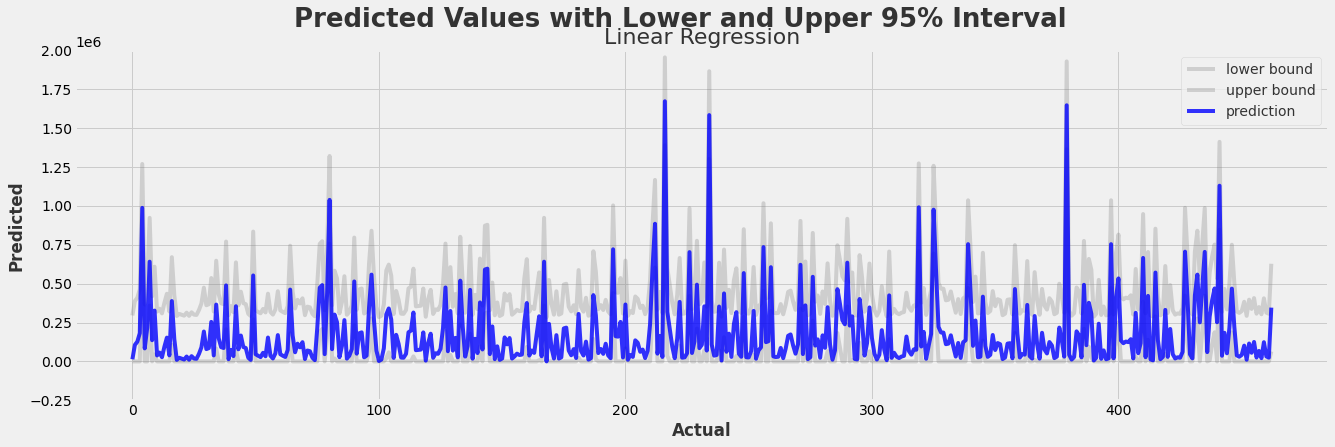

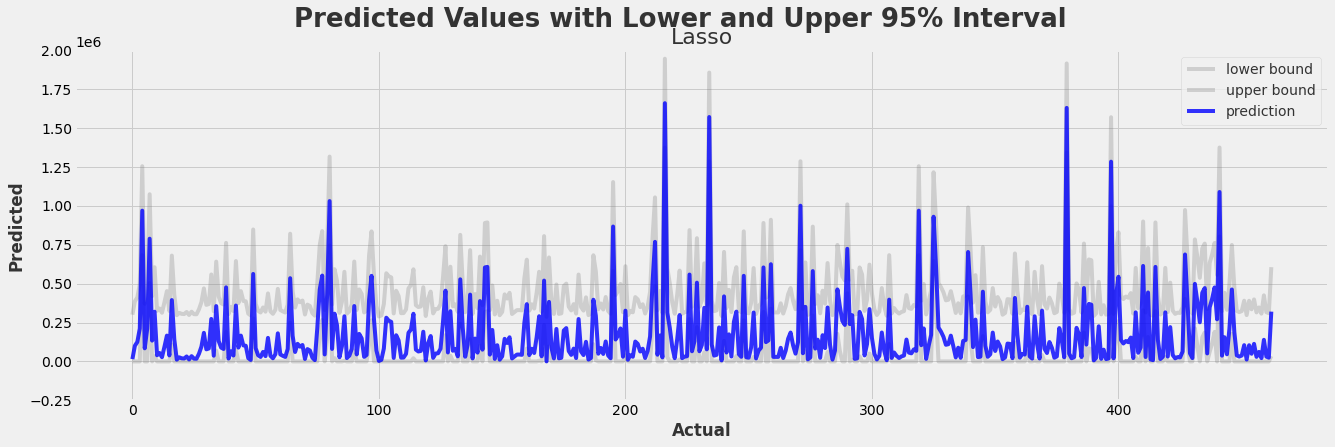

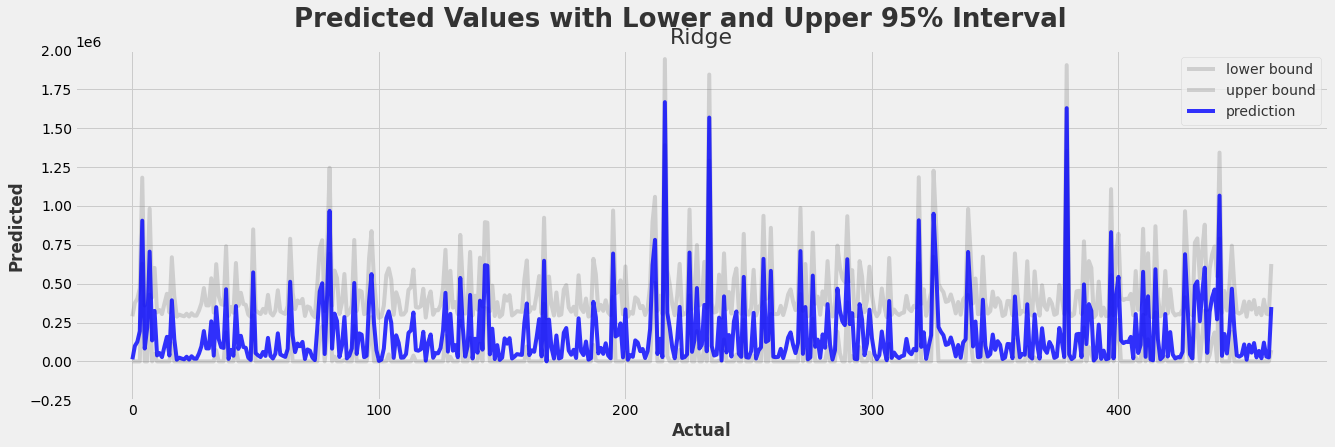

In [262]:
# Plotting the predicted and actual data 
lr_models = ['Linear Regression', 'Lasso', 'Ridge']
i = 0

for df_model in df_models:
    plt.figure(figsize=(20,6))
    plt.suptitle("Predicted Values with Lower and Upper 95% Interval", fontsize=26, weight='bold')
    plt.title(lr_models[i], fontsize=22)
    i += 1
    plt.plot('lower', data=df_model, label='lower bound', alpha=0.3, color='grey')
    plt.plot('upper', data=df_model, label='upper bound', alpha=0.3, color='grey')
    plt.plot('mean', data=df_model, label='prediction', alpha=0.8, color='b')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.ylim(-250000, 2000000)
    plt.legend();
